In [228]:
from qiskit import *
from qiskit.visualization import *
from qiskit.circuit.library import MCMT

from qiskit.visualization import plot_histogram
from qiskit.circuit.library import QFT

import numpy as np
import matplotlib.pyplot as plt
import math

sim = Aer.get_backend('qasm_simulator')

# using tikzplotlib to export plot to latex
import tikzplotlib

def tikzplotlib_fix_ncols(obj):
    """
    workaround for matplotlib 3.6 renamed legend's _ncol to _ncols, which breaks tikzplotlib
    """
    if hasattr(obj, "_ncols"):
        obj._ncol = obj._ncols
    for child in obj.get_children():
        tikzplotlib_fix_ncols(child)

def save_fig(name, width='10cm', height='10cm'):
    fig = plt.gcf()
    tikzplotlib_fix_ncols(fig)

    tikzplotlib.clean_figure()
    tikzplotlib.save(name + '.tex', axis_width=width, axis_height=height)

In [229]:
qc2 = QuantumCircuit(2)
qc2.h([0,1])

qc2.barrier()

qc2.cz(0,1)

qc2.barrier()

qc2.h([0,1])
qc2.x([0,1])
qc2.cz(0,1)
qc2.x([0,1])
qc2.h([0,1])

qc2.measure_all()

print(qc2.draw(output='latex_source'))

\documentclass[border=2px]{standalone}

\usepackage[braket, qm]{qcircuit}
\usepackage{graphicx}

\begin{document}
\scalebox{1.0}{
\Qcircuit @C=1.0em @R=0.2em @!R { \\
	 	\nghost{{q}_{0} :  } & \lstick{{q}_{0} :  } & \gate{\mathrm{H}} \barrier[0em]{1} & \qw & \ctrl{1} \barrier[0em]{1} & \qw & \gate{\mathrm{H}} & \gate{\mathrm{X}} & \ctrl{1} & \gate{\mathrm{X}} & \gate{\mathrm{H}} \barrier[0em]{1} & \qw & \meter & \qw & \qw & \qw\\
	 	\nghost{{q}_{1} :  } & \lstick{{q}_{1} :  } & \gate{\mathrm{H}} & \qw & \control\qw & \qw & \gate{\mathrm{H}} & \gate{\mathrm{X}} & \control\qw & \gate{\mathrm{X}} & \gate{\mathrm{H}} & \qw & \qw & \meter & \qw & \qw\\
	 	\nghost{\mathrm{{meas} :  }} & \lstick{\mathrm{{meas} :  }} & \lstick{/_{_{2}}} \cw & \cw & \cw & \cw & \cw & \cw & \cw & \cw & \cw & \cw & \dstick{_{_{\hspace{0.0em}0}}} \cw \ar @{<=} [-2,0] & \dstick{_{_{\hspace{0.0em}1}}} \cw \ar @{<=} [-1,0] & \cw & \cw\\
\\ }}
\end{document}


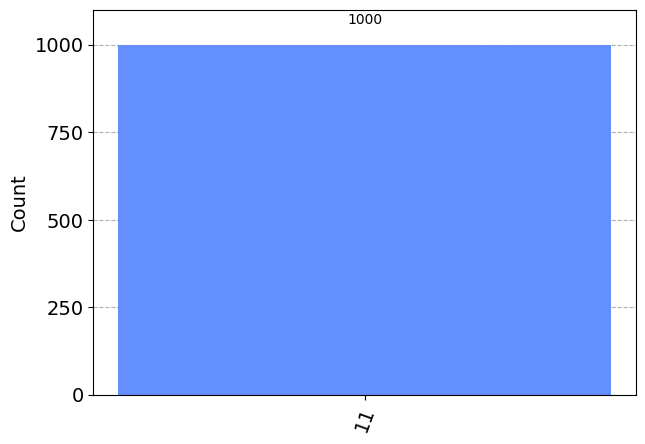

In [230]:
result = execute(qc2, sim, shots=1000).result()
counts = result.get_counts(qc2)
plot_histogram(counts)

In [231]:
qc3 = QuantumCircuit(3)

qc3.h([0,1,2])

qc3.barrier()

qc3.cz(0,1)
qc3.cz(0,2)

qc3.barrier()

qc3.h([0,1,2])
qc3.x([0,1,2])
qc3.ccz(0,1,2)
qc3.x([0,1,2])
qc3.h([0,1,2])

qc3.barrier()

qc3.measure_all()

print(qc3.draw(output='latex_source'))

\documentclass[border=2px]{standalone}

\usepackage[braket, qm]{qcircuit}
\usepackage{graphicx}

\begin{document}
\scalebox{1.0}{
\Qcircuit @C=1.0em @R=0.2em @!R { \\
	 	\nghost{{q}_{0} :  } & \lstick{{q}_{0} :  } & \gate{\mathrm{H}} \barrier[0em]{2} & \qw & \ctrl{1} & \ctrl{2} \barrier[0em]{2} & \qw & \gate{\mathrm{H}} & \gate{\mathrm{X}} & \ctrl{1} & \gate{\mathrm{X}} & \gate{\mathrm{H}} \barrier[0em]{2} & \qw \barrier[0em]{2} & \qw & \meter & \qw & \qw & \qw & \qw\\
	 	\nghost{{q}_{1} :  } & \lstick{{q}_{1} :  } & \gate{\mathrm{H}} & \qw & \control\qw & \qw & \qw & \gate{\mathrm{H}} & \gate{\mathrm{X}} & \ctrl{1} & \gate{\mathrm{X}} & \gate{\mathrm{H}} & \qw & \qw & \qw & \meter & \qw & \qw & \qw\\
	 	\nghost{{q}_{2} :  } & \lstick{{q}_{2} :  } & \gate{\mathrm{H}} & \qw & \qw & \control\qw & \qw & \gate{\mathrm{H}} & \gate{\mathrm{X}} & \control\qw & \gate{\mathrm{X}} & \gate{\mathrm{H}} & \qw & \qw & \qw & \qw & \meter & \qw & \qw\\
	 	\nghost{\mathrm{{meas} :  }} & \lstick{\mathrm

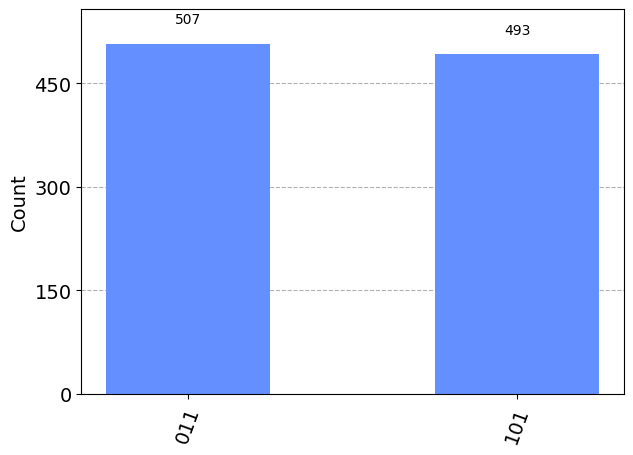

In [232]:
result = execute(qc3, sim, shots=1000).result()
counts = result.get_counts(qc3)
plot_histogram(counts)

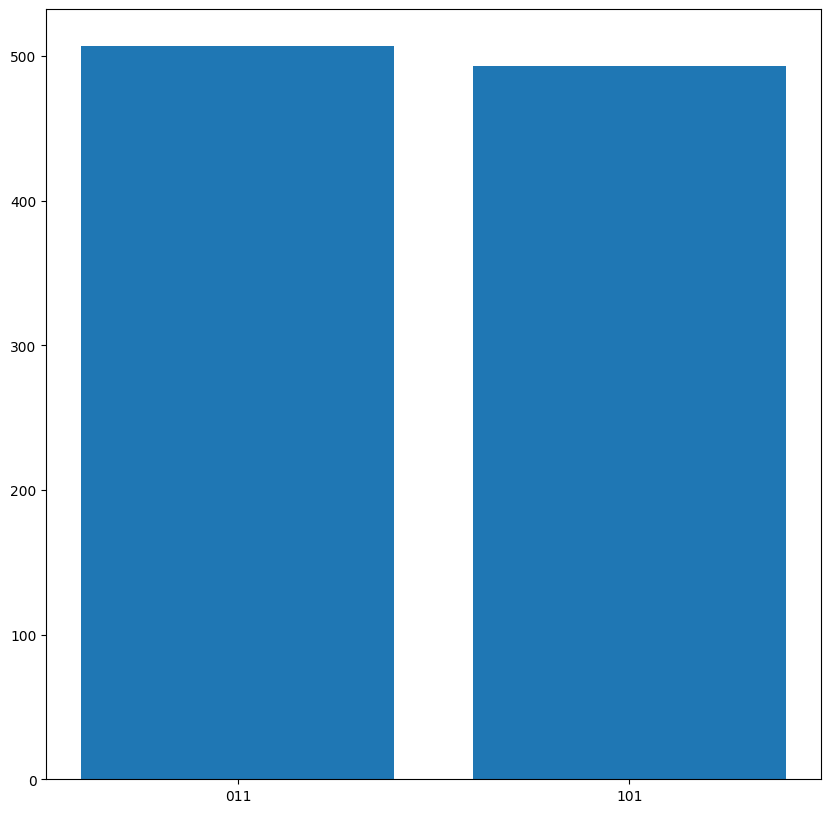

In [233]:
plt.figure(figsize=(10,10))
plt.bar(counts.keys(), counts.values())
save_fig('grover_3bit')

In [234]:
np.pi/4 * np.sqrt(2**4 / 4)

1.5707963267948966

In [235]:
qc4 = QuantumCircuit(4)

qc4.h([0,1,2,3])

qc4.barrier()

qc4.cz(0,1)
qc4.cz(0,2)
qc4.cz(0,3)

qc4.barrier()

qc4.h([0,1,2,3])
qc4.x([0,1,2,3])
qc4.compose(MCMT('z', 3, 1), [0,1,2,3], inplace=True)
qc4.x([0,1,2,3])
qc4.h([0,1,2,3])

qc4.barrier()

qc4.measure_all()

print(qc4.draw(output='latex_source'))

\documentclass[border=2px]{standalone}

\usepackage[braket, qm]{qcircuit}
\usepackage{graphicx}

\begin{document}
\scalebox{1.0}{
\Qcircuit @C=1.0em @R=0.2em @!R { \\
	 	\nghost{{q}_{0} :  } & \lstick{{q}_{0} :  } & \gate{\mathrm{H}} \barrier[0em]{3} & \qw & \ctrl{1} & \ctrl{2} & \ctrl{3} \barrier[0em]{3} & \qw & \gate{\mathrm{H}} & \gate{\mathrm{X}} & \ctrl{1} & \gate{\mathrm{X}} & \gate{\mathrm{H}} \barrier[0em]{3} & \qw \barrier[0em]{3} & \qw & \meter & \qw & \qw & \qw & \qw & \qw\\
	 	\nghost{{q}_{1} :  } & \lstick{{q}_{1} :  } & \gate{\mathrm{H}} & \qw & \control\qw & \qw & \qw & \qw & \gate{\mathrm{H}} & \gate{\mathrm{X}} & \ctrl{1} & \gate{\mathrm{X}} & \gate{\mathrm{H}} & \qw & \qw & \qw & \meter & \qw & \qw & \qw & \qw\\
	 	\nghost{{q}_{2} :  } & \lstick{{q}_{2} :  } & \gate{\mathrm{H}} & \qw & \qw & \control\qw & \qw & \qw & \gate{\mathrm{H}} & \gate{\mathrm{X}} & \ctrl{1} & \gate{\mathrm{X}} & \gate{\mathrm{H}} & \qw & \qw & \qw & \qw & \meter & \qw & \qw & \qw\\
	 	\nghost{

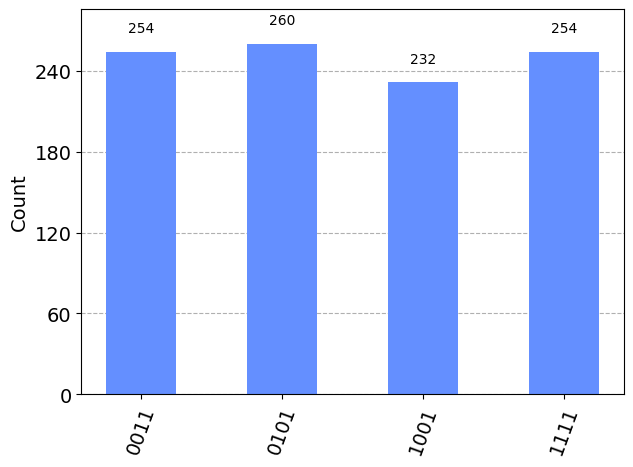

In [236]:
result = execute(qc4, sim, shots=1000).result()
counts = result.get_counts(qc4)
plot_histogram(counts)

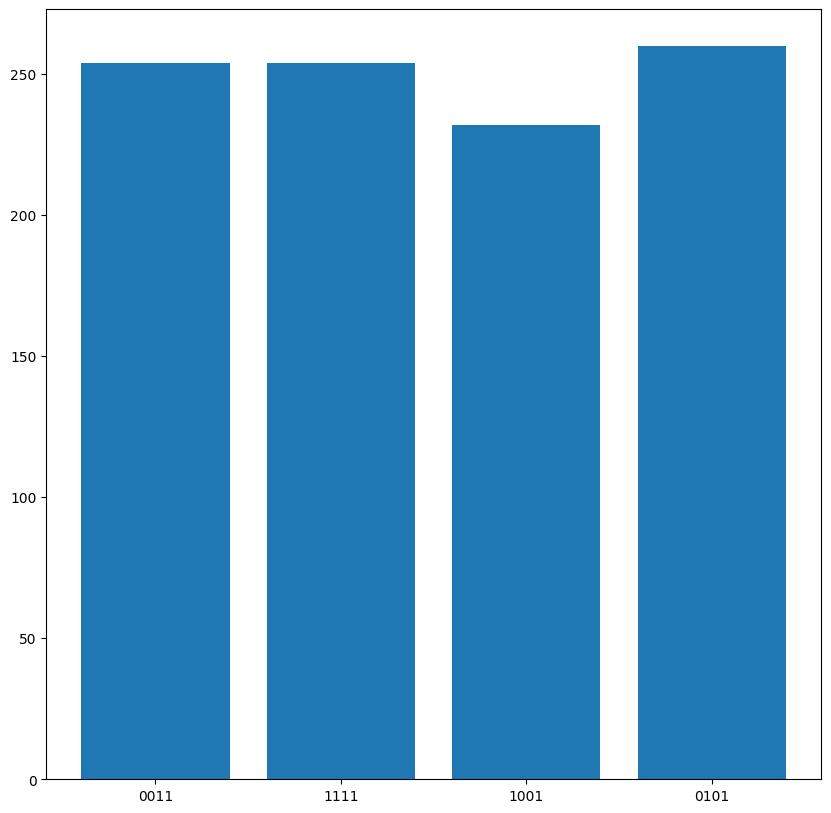

In [248]:
plt.figure(figsize=(10,10))
plt.bar(counts.keys(), counts.values())
save_fig('grover_4bit')

In [237]:
from qiskit.circuit.library import QFT

In [238]:
def grover_operator(n_iterations):
    """Grover iteration circuit for oracle with 5/16 solutions
        Args:
            n_iterations (int): number of times to repeat the circuit
        Returns:
            Gate that implements n_iterations of the Grover operator
    """
    from qiskit.circuit.library import Diagonal, GroverOperator
    oracle = Diagonal([1,1,1,-1,1,-1,1,1,-1,1,1,1,1,1,1,-1])
    grover_it = GroverOperator(oracle).repeat(n_iterations).to_gate()
    grover_it.label = f"Grover^{n_iterations}"
    return grover_it

In [239]:
# Create QuantumCircuit
t = 5   # no. of counting qubits

qft_dagger = QFT(t, inverse=True).to_gate()
qft_dagger.label = "QFT†"

n = 4   # no. of searching qubits
qc = QuantumCircuit(n+t, t) # Circuit with n+t qubits and t classical bits

# Initialize all qubits to |+>
for qubit in range(t+n):
    qc.h(qubit)

# Begin controlled Grover iterations
n_iterations = 1
for qubit in range(t):
    cgrit = grover_operator(n_iterations).control()
    qc.append(cgrit, [qubit] + list(range(t, n+t)))
    n_iterations *= 2

# Do inverse QFT on counting qubits
qc.append(qft_dagger, range(t))

# Measure counting qubits
qc.measure(range(t), range(t))

# Display the circuit
print(qc.draw(fold=-1, output='latex_source'))

\documentclass[border=2px]{standalone}

\usepackage[braket, qm]{qcircuit}
\usepackage{graphicx}

\begin{document}
\scalebox{1.0}{
\Qcircuit @C=1.0em @R=0.2em @!R { \\
	 	\nghost{{q}_{0} :  } & \lstick{{q}_{0} :  } & \gate{\mathrm{H}} & \ctrl{5} & \qw & \qw & \qw & \qw & \multigate{4}{\mathrm{QFT†}}_<<<{0} & \meter & \qw & \qw & \qw & \qw & \qw & \qw\\
	 	\nghost{{q}_{1} :  } & \lstick{{q}_{1} :  } & \gate{\mathrm{H}} & \qw & \ctrl{4} & \qw & \qw & \qw & \ghost{\mathrm{QFT†}}_<<<{1} & \qw & \meter & \qw & \qw & \qw & \qw & \qw\\
	 	\nghost{{q}_{2} :  } & \lstick{{q}_{2} :  } & \gate{\mathrm{H}} & \qw & \qw & \ctrl{3} & \qw & \qw & \ghost{\mathrm{QFT†}}_<<<{2} & \qw & \qw & \meter & \qw & \qw & \qw & \qw\\
	 	\nghost{{q}_{3} :  } & \lstick{{q}_{3} :  } & \gate{\mathrm{H}} & \qw & \qw & \qw & \ctrl{2} & \qw & \ghost{\mathrm{QFT†}}_<<<{3} & \qw & \qw & \qw & \meter & \qw & \qw & \qw\\
	 	\nghost{{q}_{4} :  } & \lstick{{q}_{4} :  } & \gate{\mathrm{H}} & \qw & \qw & \qw & \qw & \ctrl{1} & \g

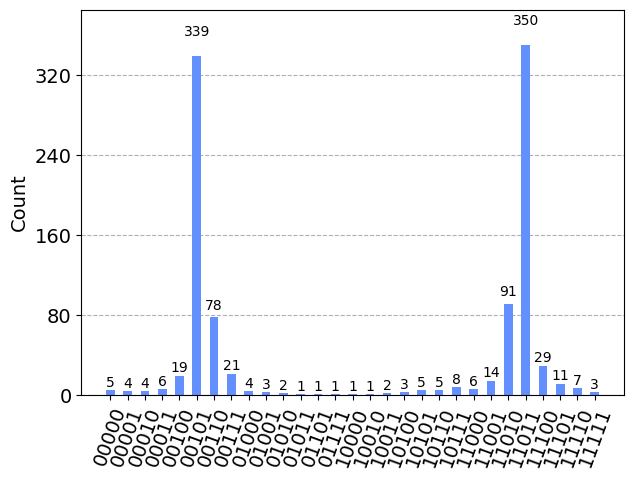

In [240]:
# Execute and see results
sim = Aer.get_backend('aer_simulator')
transpiled_qc = transpile(qc, sim)
job = sim.run(transpiled_qc)
hist = job.result().get_counts()
plot_histogram(hist)

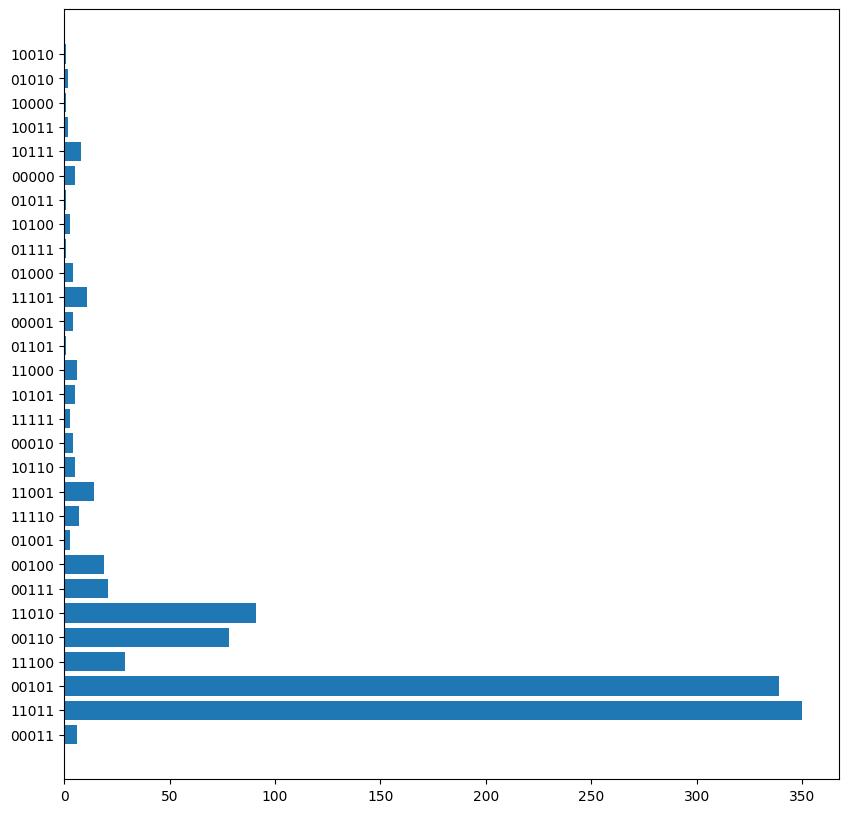

In [247]:
plt.figure(figsize=(10,10))
plt.barh(list(hist.keys()), hist.values())
save_fig('grover_4bit_angle')

In [241]:
measured_str = max(hist, key=hist.get)

In [242]:
measured_int = int(measured_str, 2)
print("Register Output = %i" % measured_int)

Register Output = 27


In [243]:
theta = (measured_int/(2**t))*math.pi*2
print("Theta = %.5f" % theta)

Theta = 5.30144


In [244]:
N = 2**n
M = N * (math.sin(theta/2)**2)
print(f"No. of Solutions = {M:.1f}")

No. of Solutions = 3.6


In [245]:
m = t - 1 # Upper bound: Will be less than this 
err = (math.sqrt(2*M*N) + N/(2**(m+1)))*(2**(-m))
print("Error < %.2f" % err)

Error < 0.70
